<a href="https://colab.research.google.com/github/RajendraPrasad96536/Computer-Vision-with-Tensorflow/blob/master/Happy_Sad_Face_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback) :
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > 0.99):
                print("Reached 99% accuracy so cancelling training!")
                self.model.stop_training = True

callbacks = myCallback()

--2020-07-18 11:09:27--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.03s   

2020-07-18 11:09:27 (100 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory("/tmp/h-or-s", target_size = (150,150), batch_size=64, class_mode = 'binary')

Found 80 images belonging to 2 classes.


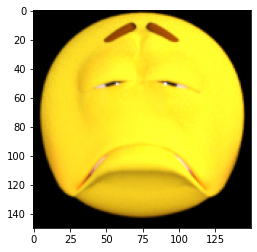

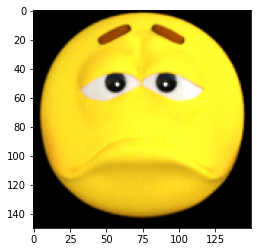

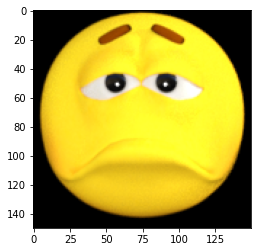

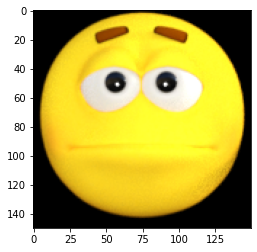

In [4]:
x_batch, y_batch = next(train_generator)
import matplotlib.pyplot as plt

for i in range (0,4):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

In [5]:
batch_size = 64
steps = x_batch.shape[0]//batch_size

In [6]:
history = model.fit_generator(
          train_generator, epochs = 20, steps_per_epoch = steps, verbose=1, callbacks=[callbacks])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1/1 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.5625
Epoch 2/20
1/1 [==============================] - 0s 2ms/step - loss: 0.8766 - accuracy: 0.6250
Epoch 3/20
1/1 [==============================] - 0s 2ms/step - loss: 0.6645 - accuracy: 1.0000
